In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('spam.tsv', sep='\t')

In [4]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [5]:
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [6]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [26]:
labels_count = df['label'].value_counts()
print(labels_count)

label
ham     4825
spam     747
Name: count, dtype: int64


In [8]:
labels_count / len(df) * 100

label
ham     86.593683
spam    13.406317
Name: count, dtype: float64

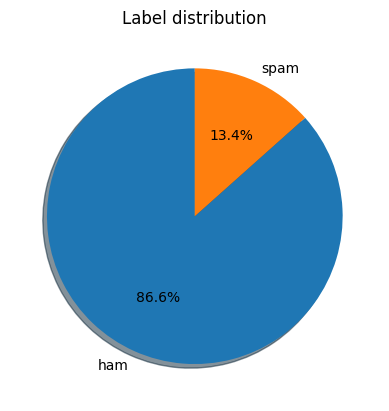

In [9]:
plt.pie(labels_count, labels=labels_count.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Label distribution')
plt.show()


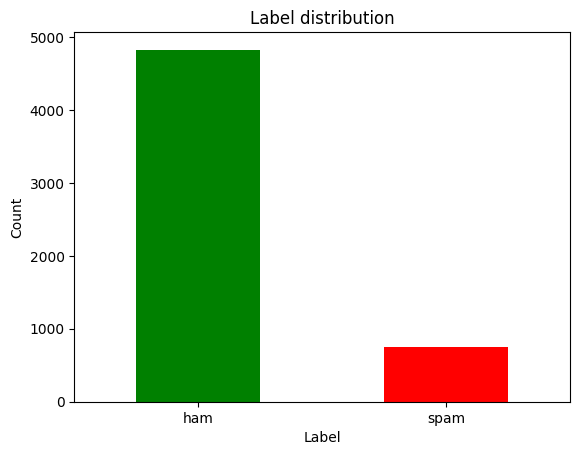

In [17]:
labels_count.plot(kind='bar', rot=0, color=['g', 'r'])
plt.title('Label distribution')
plt.ylabel('Count')
plt.xlabel('Label')
plt.show()



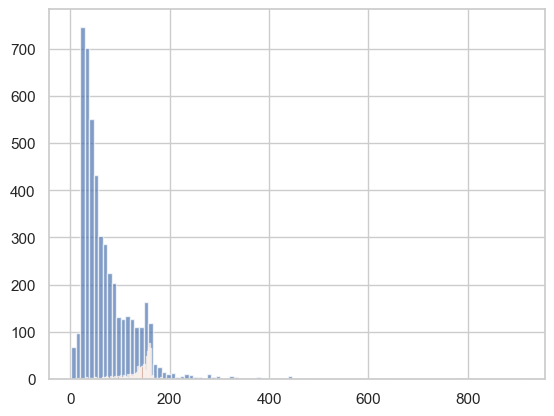

In [22]:
plt.hist(df[df['label'] == 'ham']['length'], bins=100, alpha=0.7, label='Ham')
plt.hist(df[df['label'] == 'spam']['length'], bins=100, alpha=0.7, label='Spam')
plt.show()

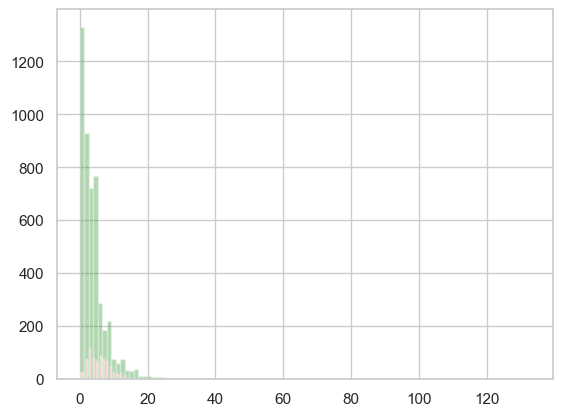

In [25]:
plt.hist(df[df['label'] == 'ham']['punct'], bins=100, alpha=0.3, label='Ham', color='green')
plt.hist(df[df['label'] == 'spam']['punct'], bins=100, alpha=0.7, label='Spam', color='red')
plt.show()


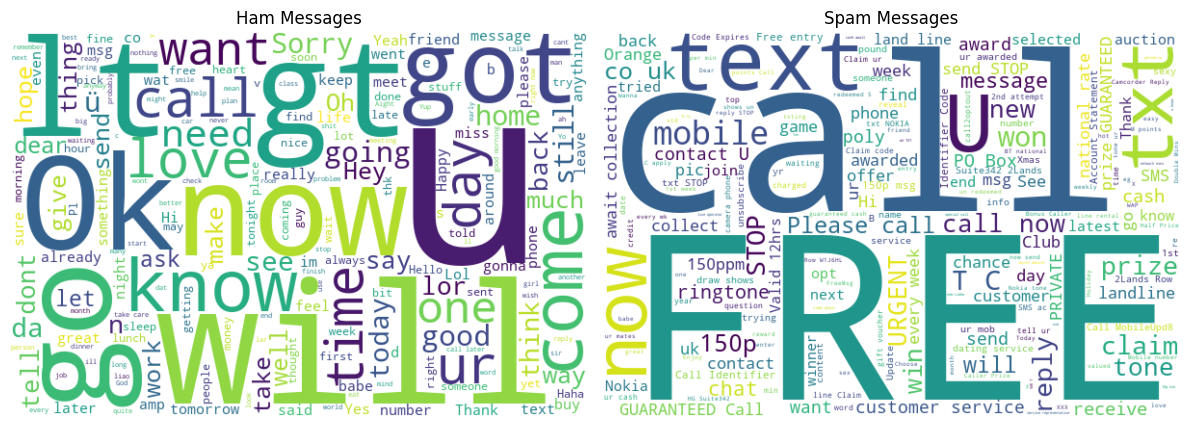

In [10]:
from wordcloud import WordCloud

# Separate messages into 'ham' and 'spam'
ham_messages = df[df['label']=='ham']['message']
spam_messages = df[df['label']=='spam']['message']

# Generate word clouds for 'ham' and 'spam'
ham_wordcloud = WordCloud(width=600, height=400, background_color='white') \
    .generate(' '.join(ham_messages))
spam_wordcloud = WordCloud(width=600, height=400, background_color='white') \
    .generate(' '.join(spam_messages))

# Plot the word clouds
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(ham_wordcloud, interpolation='bilinear')
axes[0].set_title('Ham Messages')
axes[0].axis('off')

axes[1].imshow(spam_wordcloud, interpolation='bilinear')
axes[1].set_title('Spam Messages')
axes[1].axis('off')

plt.tight_layout()
plt.show()
